<center><b> Task 2 </b></center>

### Diffusion Dynamics

> *Spreading: Simulate, using the NDlib (https://github.com/GiulioRossetti/ndlib) python library, the diffusion models discussed during the course (i.e., SI, SIS, SIR and Threshold model) both on the crawled data and on synthetic graphs (i.e., ER and BA). Analyse the simulation results varying both model parameters and initial conditions (i.e., the infection seeds);*

This task has the goal to  

In [1]:
import pandas as pd
import csv
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
import ndlib
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
import ndlib.models.epidemics as ep
warnings.filterwarnings('ignore')
from cdlib import algorithms, viz, evaluation

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'karateclub', 'graph_tool'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [2]:
g = nx.read_edgelist("Links.csv", delimiter=",", nodetype=int) #graph

In [3]:
#ER model
p = nx.density(g)
n = nx.number_of_nodes(g)
er = nx.erdos_renyi_graph(n, p)

In [4]:
#BA model
m = int(nx.number_of_edges(g)/nx.number_of_nodes(g))
ba = nx.barabasi_albert_graph(n, m)

## SI model
In this model, during the course of an epidemics, a node is allowed to change its status only from Susceptible (S) to Infected (I). The model is instantiated on a graph having a non-empty set of infected nodes. SI assumes that if, during a generic iteration, a susceptible node comes into contact with an infected one, it becomes infected with probability β: once a node becomes infected, it stays infected (the only transition allowed is S→I).

##### SI model applied on the real graph with random initial infected nodes

In [12]:
model = ep.SIModel(g)

cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.001) # infection rate
cfg.add_model_parameter("fraction_infected", 0.095)
model.set_initial_status(cfg)

iterations = model.iteration_bunch(1000, node_status=True,progress_bar=True)
trends = model.build_trends(iterations)

100%|██████████| 1000/1000 [02:57<00:00,  5.62it/s]


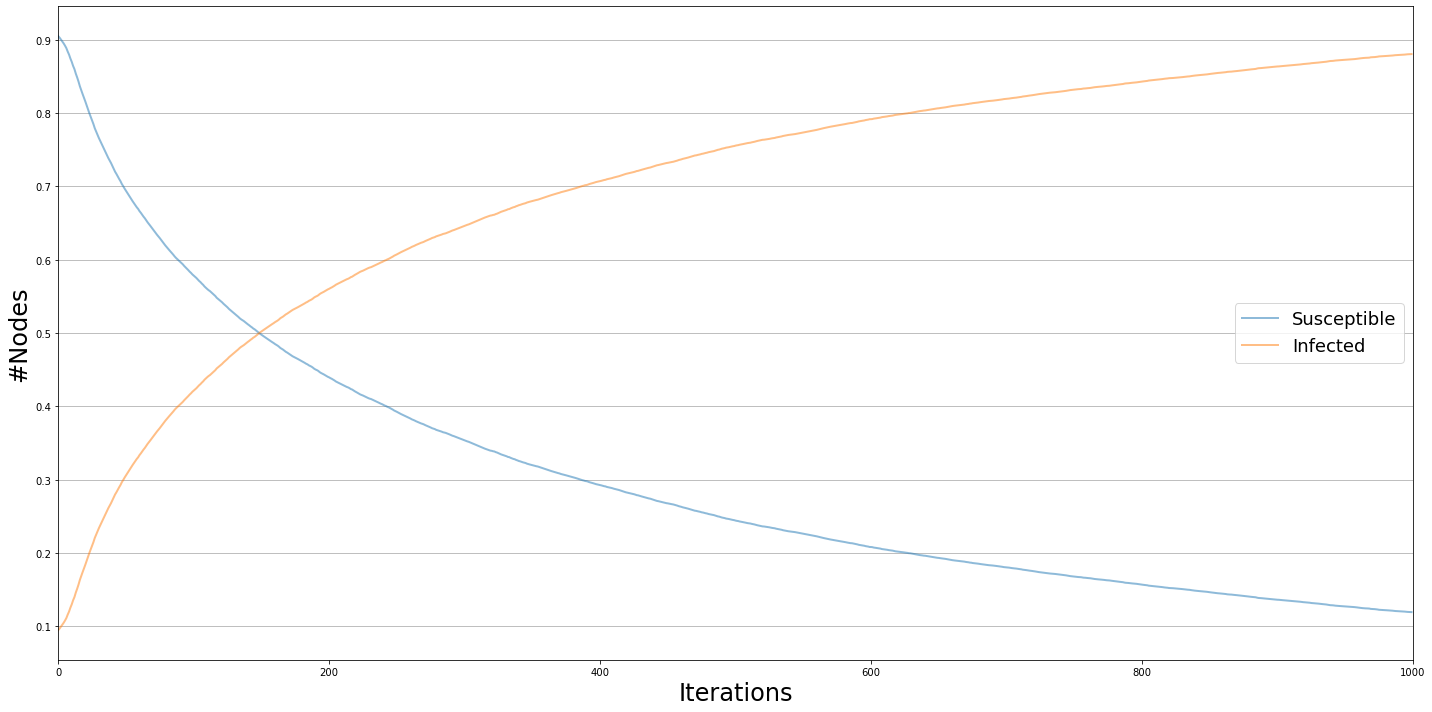

In [13]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

##### SI model applied on the real graph selecting the largest hub (node 4) and its naighbours as initial infected set

In [7]:
infected_nodes = list(g.neighbors(4))

In [14]:
len(infected_nodes)

2987

In [9]:
len(infected_nodes)/31394

0.09514556921704784

In [10]:
model_2 = ep.SIModel(g)

cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.001) # infection rate
cfg.add_model_initial_configuration("Infected", infected_nodes)
model_2.set_initial_status(cfg)

iterations = model_2.iteration_bunch(1000, progress_bar=True)
trends = model_2.build_trends(iterations)

100%|██████████| 1000/1000 [02:19<00:00,  7.15it/s]


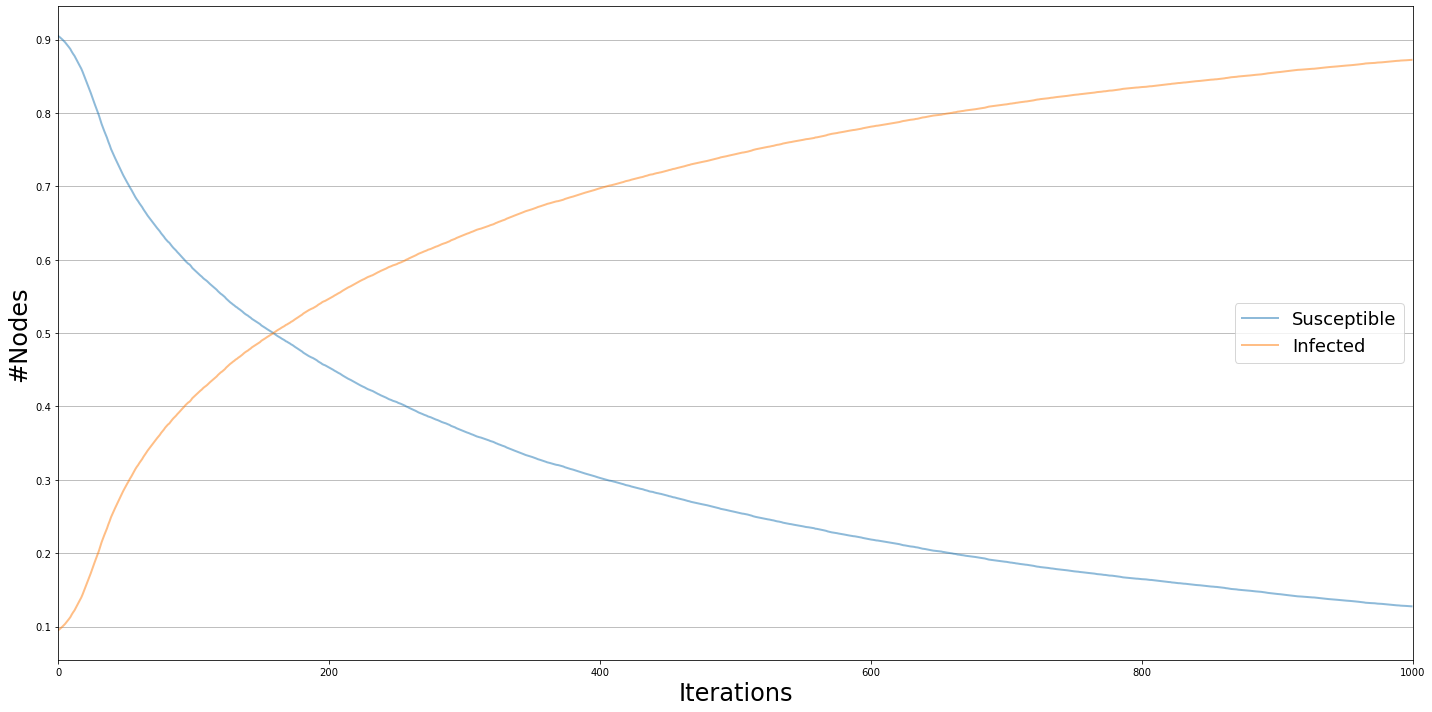

In [11]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model_2, trends)
viz.plot()

##### SI model applied on the ER graph

In [12]:
model = ep.SIModel(er)

cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.001) # infection rate
cfg.add_model_parameter("fraction_infected", 0.095)
model.set_initial_status(cfg)

iterations = model.iteration_bunch(400, node_status=True,progress_bar=True)
trends = model.build_trends(iterations)

100%|██████████| 400/400 [01:17<00:00,  5.18it/s]


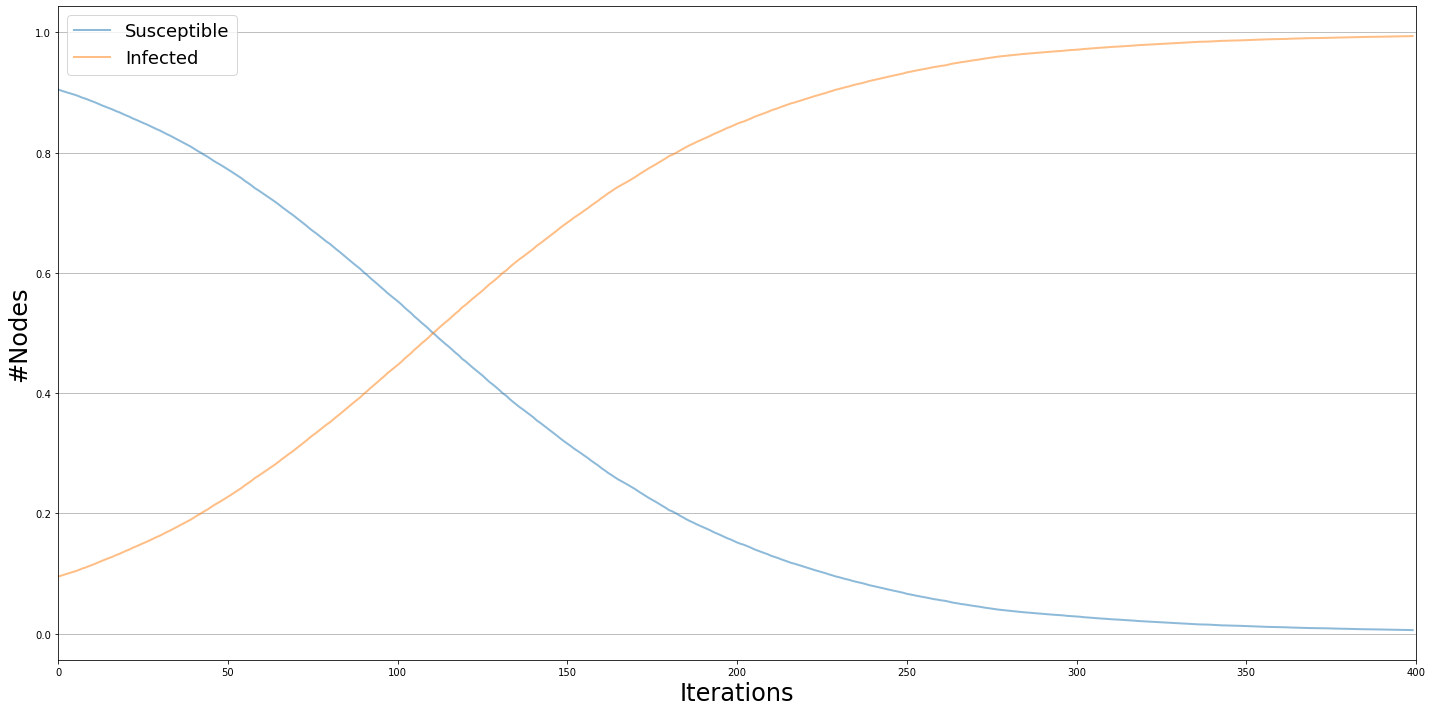

In [13]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

##### SI model applied on the BA graph

In [14]:
model = ep.SIModel(ba)

cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.001) # infection rate
cfg.add_model_parameter("fraction_infected", 0.095)
model.set_initial_status(cfg)

iterations = model.iteration_bunch(400, node_status=True,progress_bar=True)
trends = model.build_trends(iterations)

100%|██████████| 400/400 [01:12<00:00,  5.53it/s]


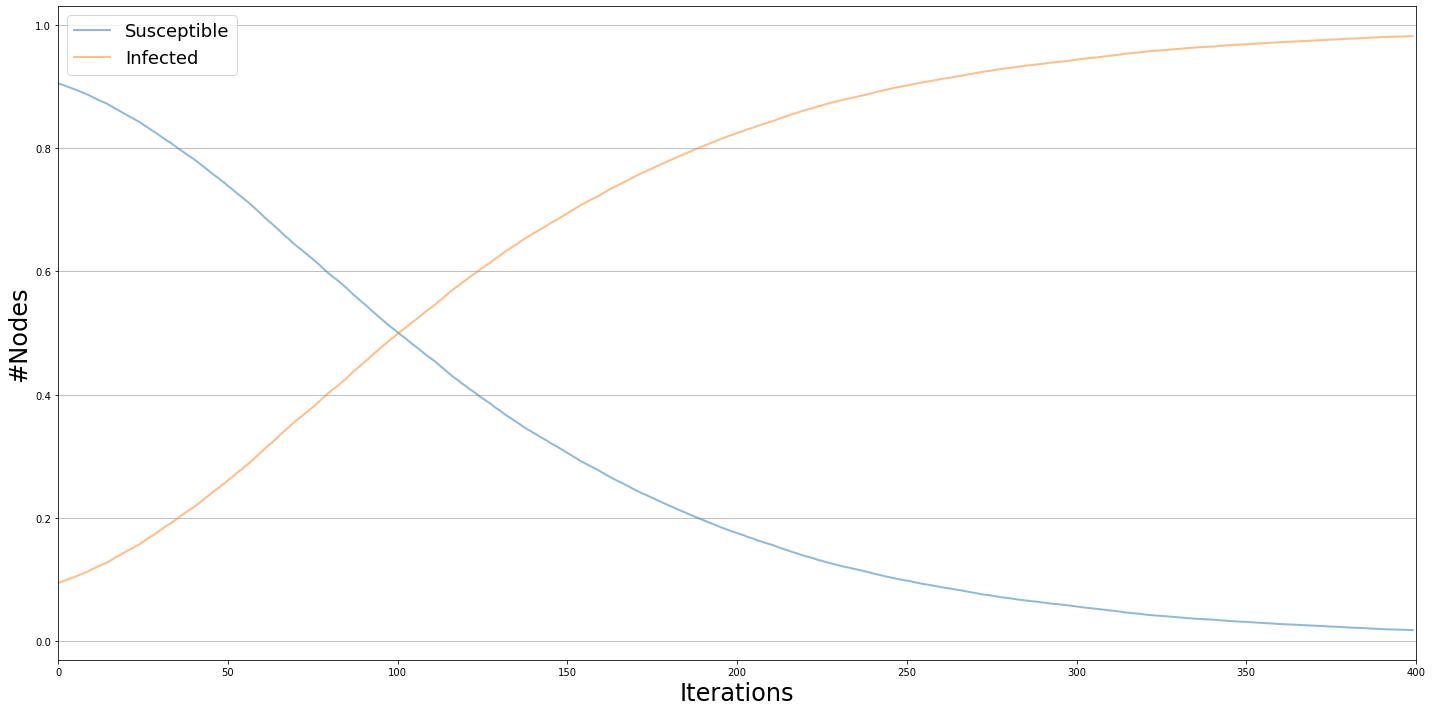

In [15]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

### SIS model
In this model, during the course of an epidemics, a node is allowed to change its status from Susceptible (S) to Infected (I). The model is instantiated on a graph having a non-empty set of infected nodes. SIS assumes that if, during a generic iteration, a susceptible node comes into contact with an infected one, it becomes infected with probability beta, than it can be switch again to susceptible with probability lambda (the only transition allowed are S→I→S).

#### SIS model applied on the real graph with random initial infected nodes

In [16]:
model = ep.SISModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01) #S=>I
cfg.add_model_parameter('lambda', 0.005) #I=>S
cfg.add_model_parameter("fraction_infected", 0.095)
model.set_initial_status(cfg)

iterations = model.iteration_bunch(150, node_status=True,progress_bar=True)
trends = model.build_trends(iterations)

100%|██████████| 150/150 [00:25<00:00,  5.78it/s]


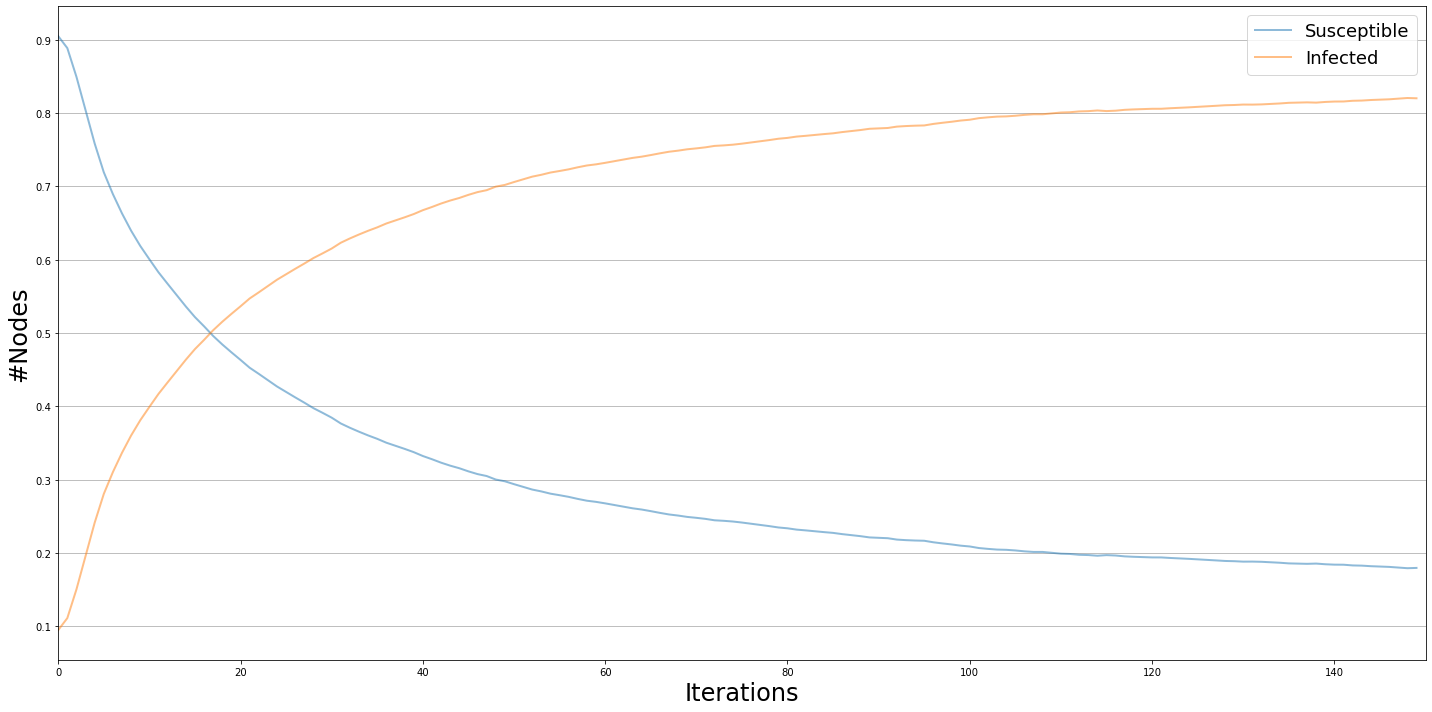

In [17]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

##### SIS model applied on the real graph selecting the largest hub (node 4) and its naighbours as initial infected set

In [18]:
model = ep.SISModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_initial_configuration("Infected", infected_nodes)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(150, node_status=True,progress_bar=True)
trends = model.build_trends(iterations)

100%|██████████| 150/150 [00:32<00:00,  4.60it/s]


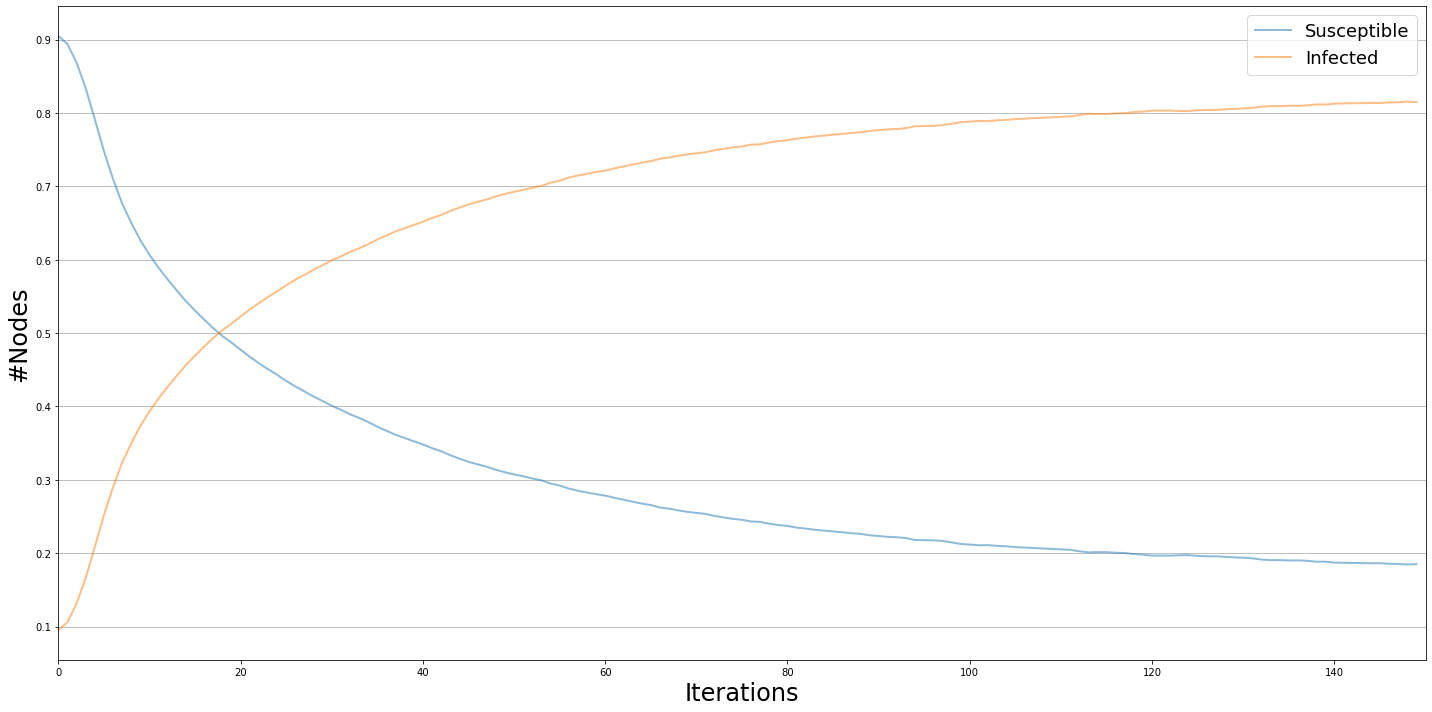

In [19]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

##### SIS model applied on the ER graph

In [20]:
model = ep.SISModel(er)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("fraction_infected", 0.095)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(150, node_status=True,progress_bar=True)
trends = model.build_trends(iterations)

100%|██████████| 150/150 [00:27<00:00,  5.50it/s]


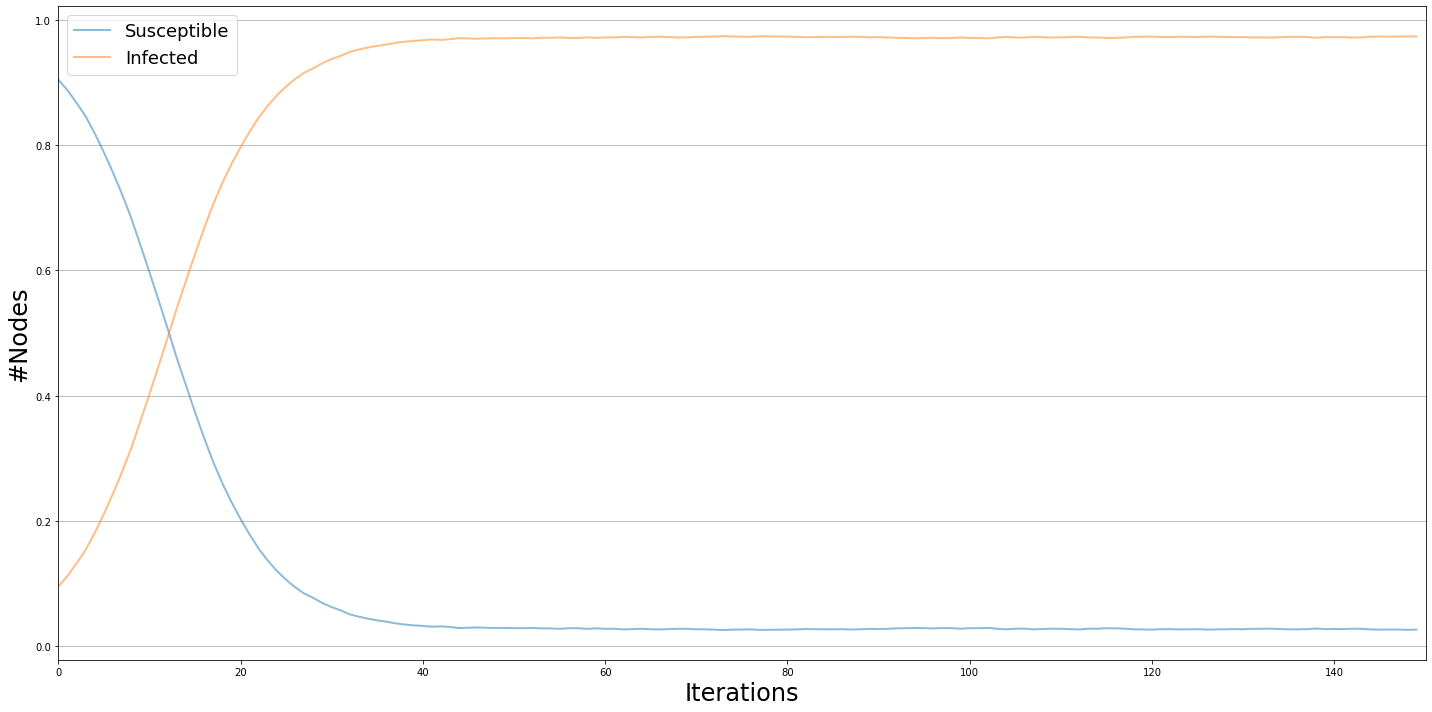

In [21]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

##### SIS model applied on the BA graph

In [22]:
model = ep.SISModel(ba)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("fraction_infected", 0.095)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(150, node_status=True,progress_bar=True)
trends = model.build_trends(iterations)

100%|██████████| 150/150 [00:26<00:00,  5.70it/s]


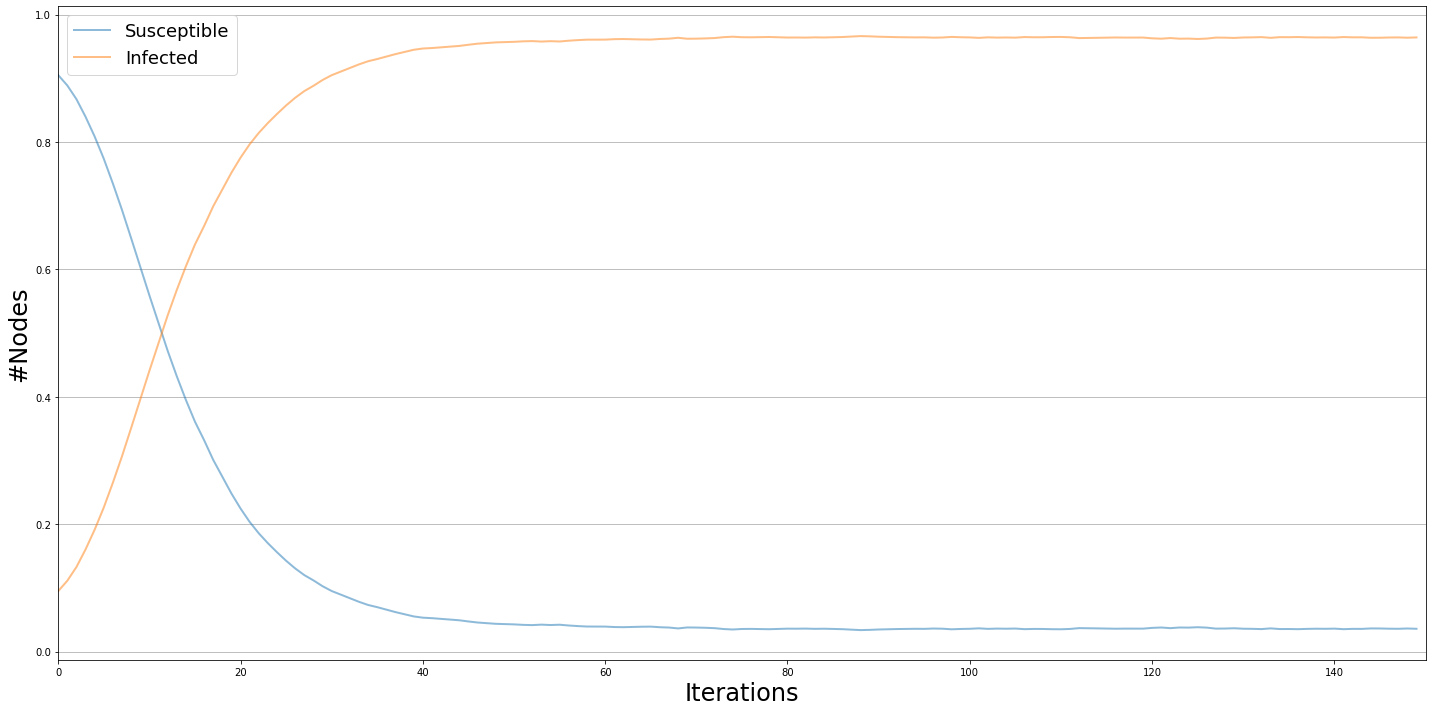

In [23]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

## SIR model
In this model, during the course of an epidemics, a node is allowed to change its status from Susceptible (S) to Infected (I), then to Removed (R). The model is instantiated on a graph having a non-empty set of infected nodes. SIR assumes that if, during a generic iteration, a susceptible node comes into contact with an infected one, it becomes infected with probability beta, than it can be switch to removed with probability gamma (the only transition allowed are S→I→R).

#### SIR model tested on the real graph selectiong random nodes for the initial set I

In [24]:
# Model selection
model = ep.SIRModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('gamma', 0.005)
cfg.add_model_parameter("fraction_infected", 0.095)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(400, node_status=True,progress_bar=True)
trends = model.build_trends(iterations)

100%|██████████| 400/400 [01:27<00:00,  4.59it/s]


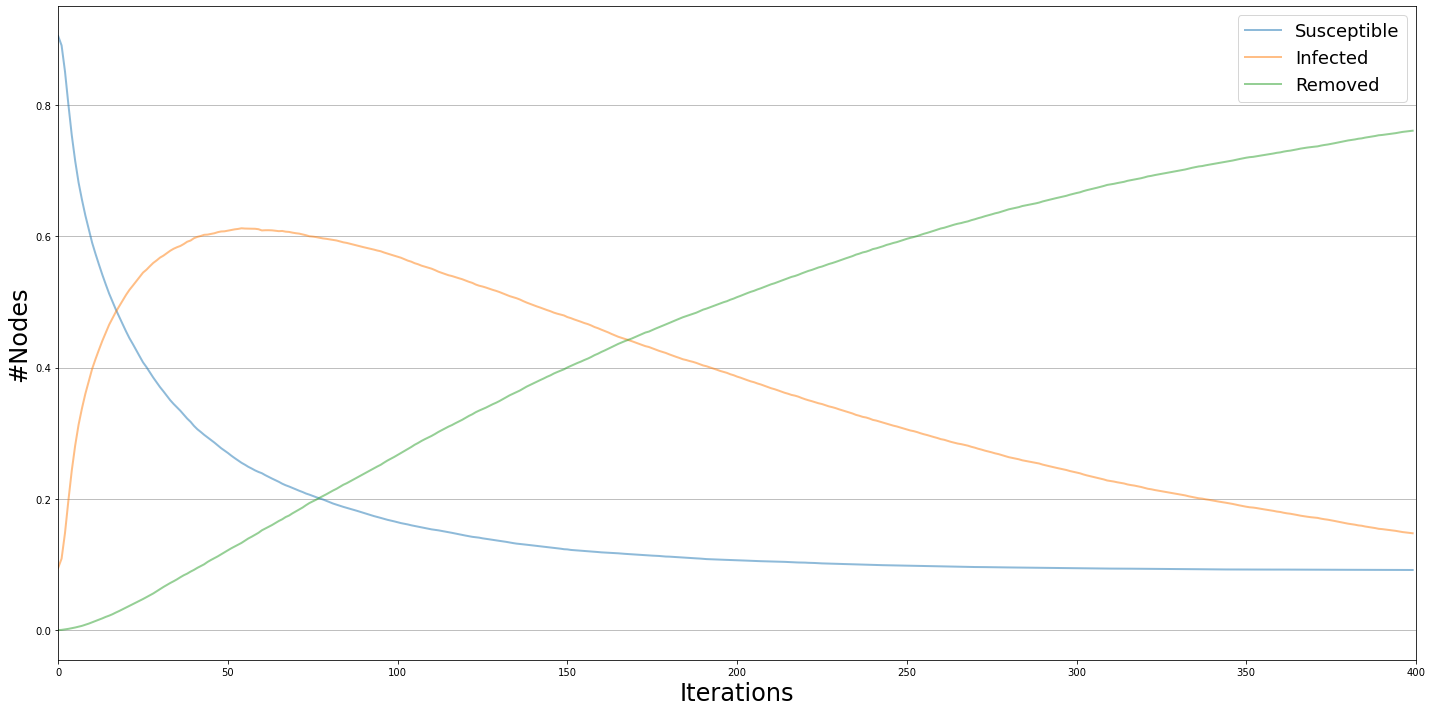

In [25]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

#### SIR model applied on the real graph selecting the largest hub (node 4) and its naighbours as initial infected set

In [26]:
# Model selection
model = ep.SIRModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('gamma', 0.005)
cfg.add_model_initial_configuration("Infected", infected_nodes)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(400, node_status=True,progress_bar=True)
trends = model.build_trends(iterations)

100%|██████████| 400/400 [01:12<00:00,  5.55it/s]


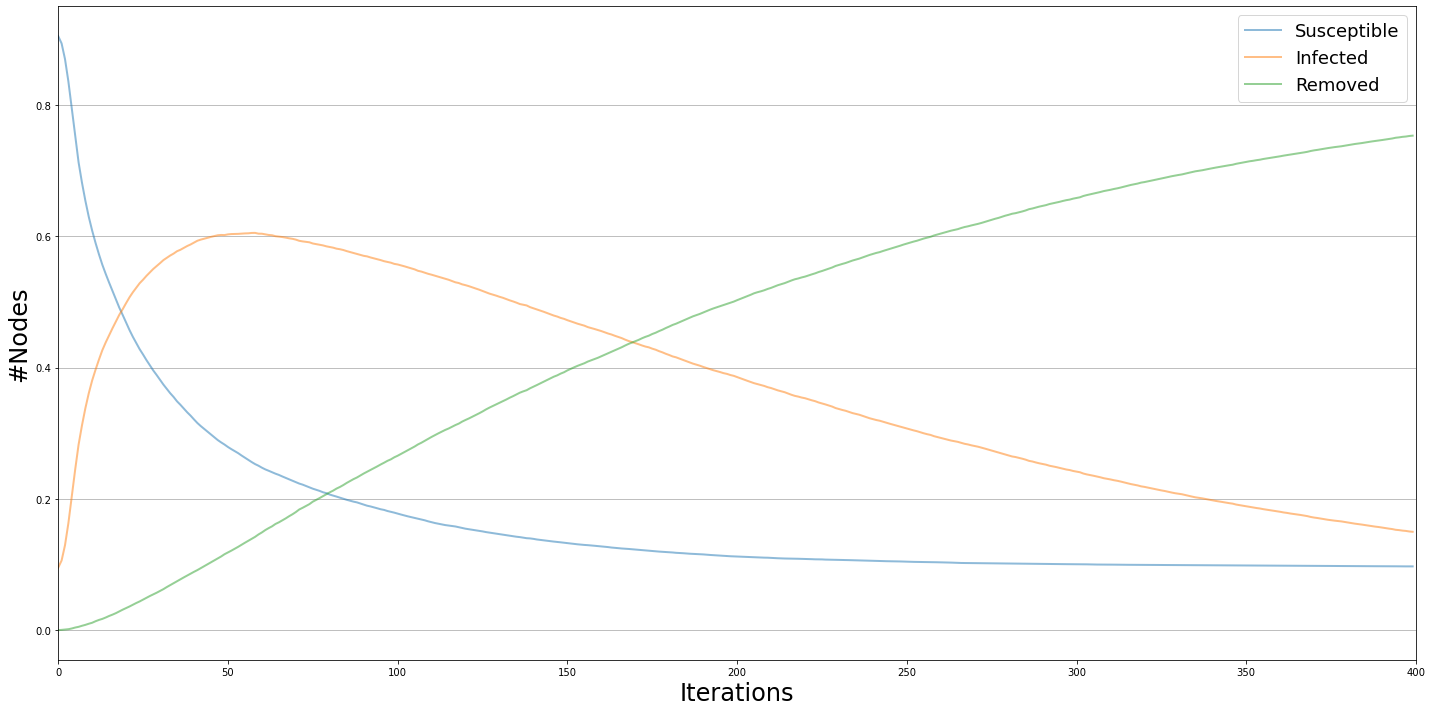

In [27]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

#### SIR model tested on the ER graph

In [28]:
# Model selection
model = ep.SIRModel(er)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('gamma', 0.005)
cfg.add_model_parameter("fraction_infected", 0.095)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200, node_status=True,progress_bar=True)
trends = model.build_trends(iterations)

100%|██████████| 200/200 [00:28<00:00,  7.06it/s]


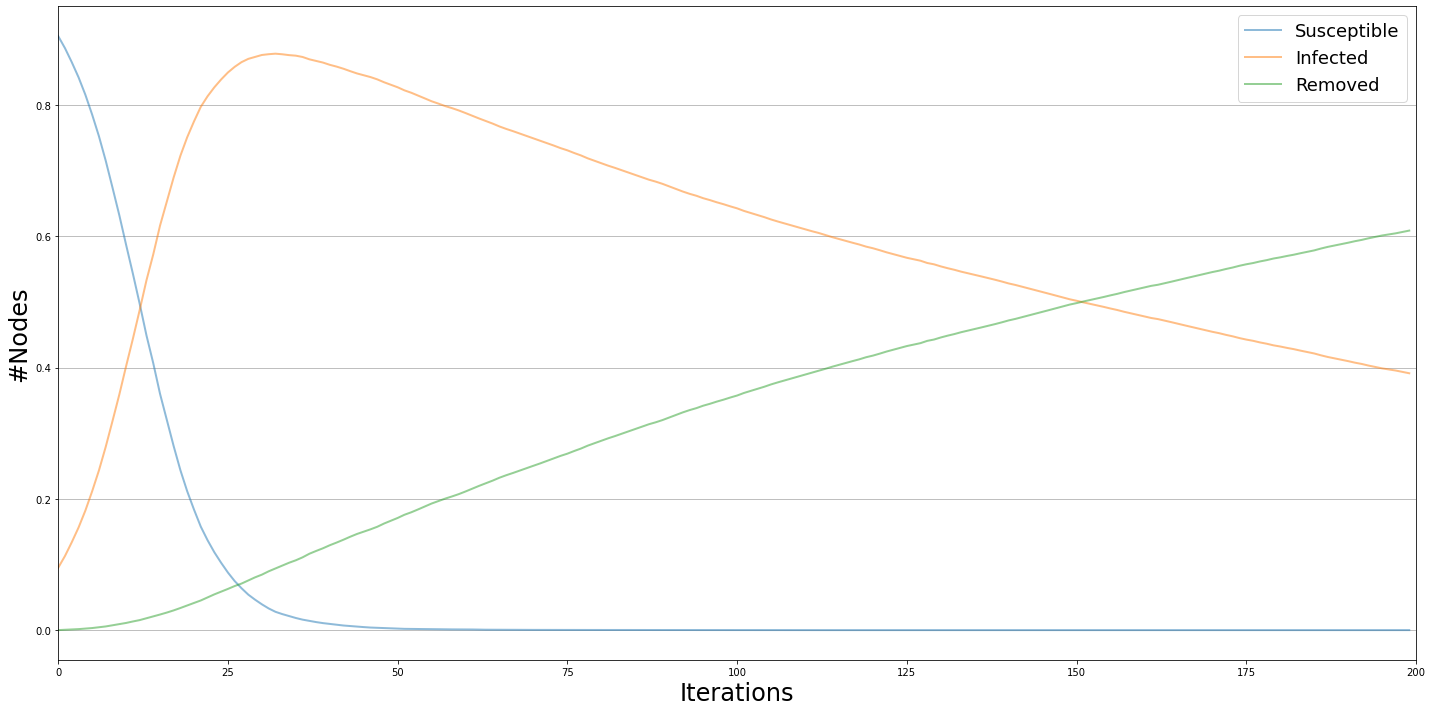

In [29]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

#### SIR model tested on BA graph

In [30]:
# Model selection
model = ep.SIRModel(ba)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('gamma', 0.005)
cfg.add_model_parameter("fraction_infected", 0.095)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200, node_status=True,progress_bar=True)
trends = model.build_trends(iterations)

100%|██████████| 200/200 [00:20<00:00,  9.55it/s]


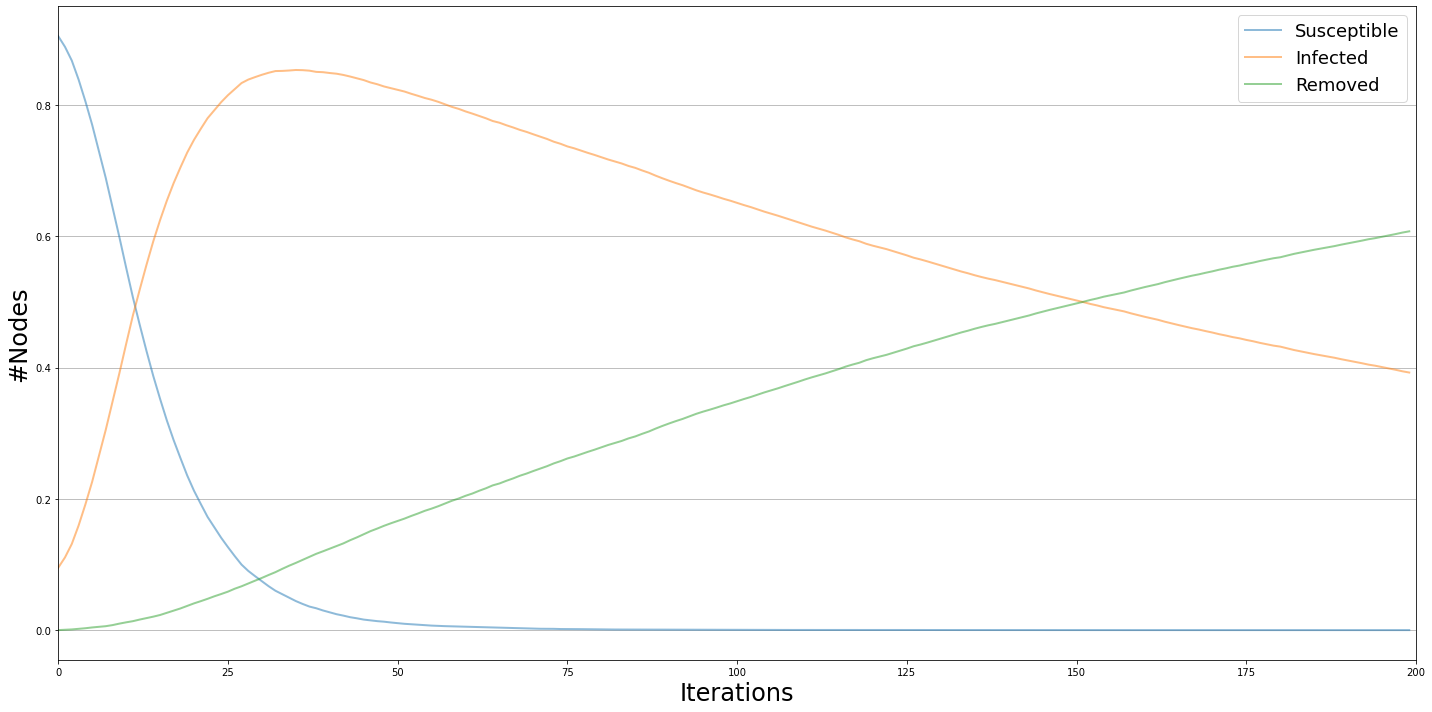

In [31]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

In [32]:
model.get_info()

{'beta': 0.01, 'gamma': 0.005, 'fraction_infected': 0.095, 'tp_rate': 1}

In [33]:
model.get_status_map()

{'Susceptible': 0, 'Infected': 1, 'Removed': 2}

## Treshold model

Node’s individual decision depends on the percentage of its neighbors that have made the same choice, thus imposing a threshold.

The model works as follows: - each node has its own threshold; - during a generic iteration every node is observed: if the percentage of its infected neighbors is greater than its threshold it becomes infected as well.

In [15]:
import seaborn as sns
from contextlib import suppress

In [4]:
df = pd.read_csv("nodes.csv", sep=',', index_col = False)

In [47]:
df.head()

,index,href,name,books,friends,followers
0,1,/user/show/53478239-luca-ambrosino,Luca Ambrosino,1524,1457,13777
1,2,/user/show/18922532-ilenia-zodiaco,Ilenia Zodiaco,994,5001,10436
2,3,/user/show/41077867-matteo-fumagalli,Matteo Fumagalli,2258,5001,5962
3,4,/user/show/50009464-julie-demar,Julie Demar,556,5000,3586
4,5,/user/show/14579657-mattia-ravasi,Mattia Ravasi,445,931,2990


Text(0.5, 1.0, 'Distribution of number of books')

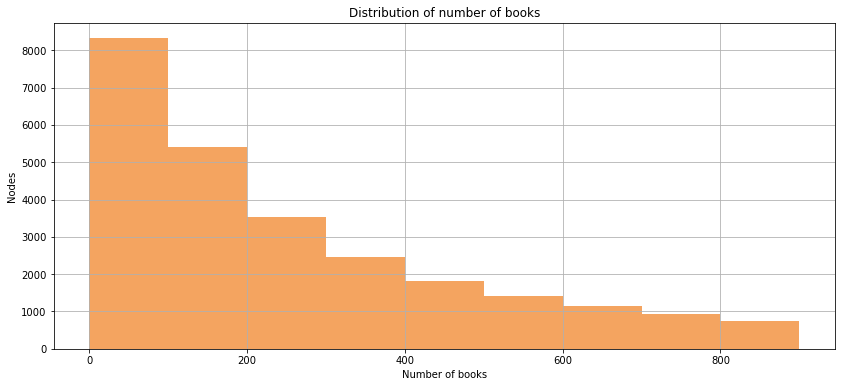

In [31]:
bin_values = np.arange(start=0, stop=1000, step= 100)
df[' books'].hist(bins=bin_values, figsize=[14,6], color = 'sandybrown')
plt.xlabel('Number of books')
plt.ylabel('Nodes')
plt.title('Distribution of number of books')

Text(0.5, 0, 'Number of books')

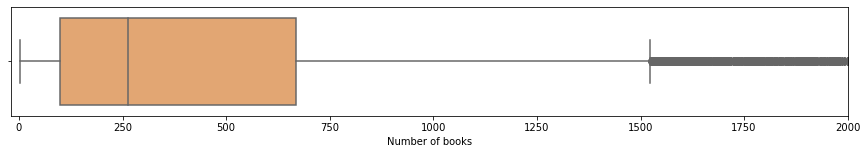

In [32]:
plt.figure(figsize=(15,2))
sns.boxplot(x=' books', data=df, color = 'sandybrown')
plt.xlim(-20, 2000)
plt.xlabel('Number of books')

In [50]:
infected_nodes = list(g.neighbors(2))

In [51]:
# Model selection

model = ep.ThresholdModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_initial_configuration("Infected", infected_nodes)

# Setting node parameters
with suppress(Exception):
    for ind, row in df.iterrows():
        #print(i)
        b = row[' books']
        i = row['index']
        if b <= 200:
                cfg.add_node_configuration("threshold", i, 0.7) #users that are more indifferent 
        elif b > 200 and b <= 400:
                cfg.add_node_configuration("threshold", i, 0.6)
        elif b > 400 and b <= 600:
                cfg.add_node_configuration("threshold", i, 0.5)
        elif b > 600:
                cfg.add_node_configuration("threshold", i, 0.4)

model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200, progress_bar=True)
trends = model.build_trends(iterations)

100%|██████████| 200/200 [00:22<00:00,  8.94it/s]


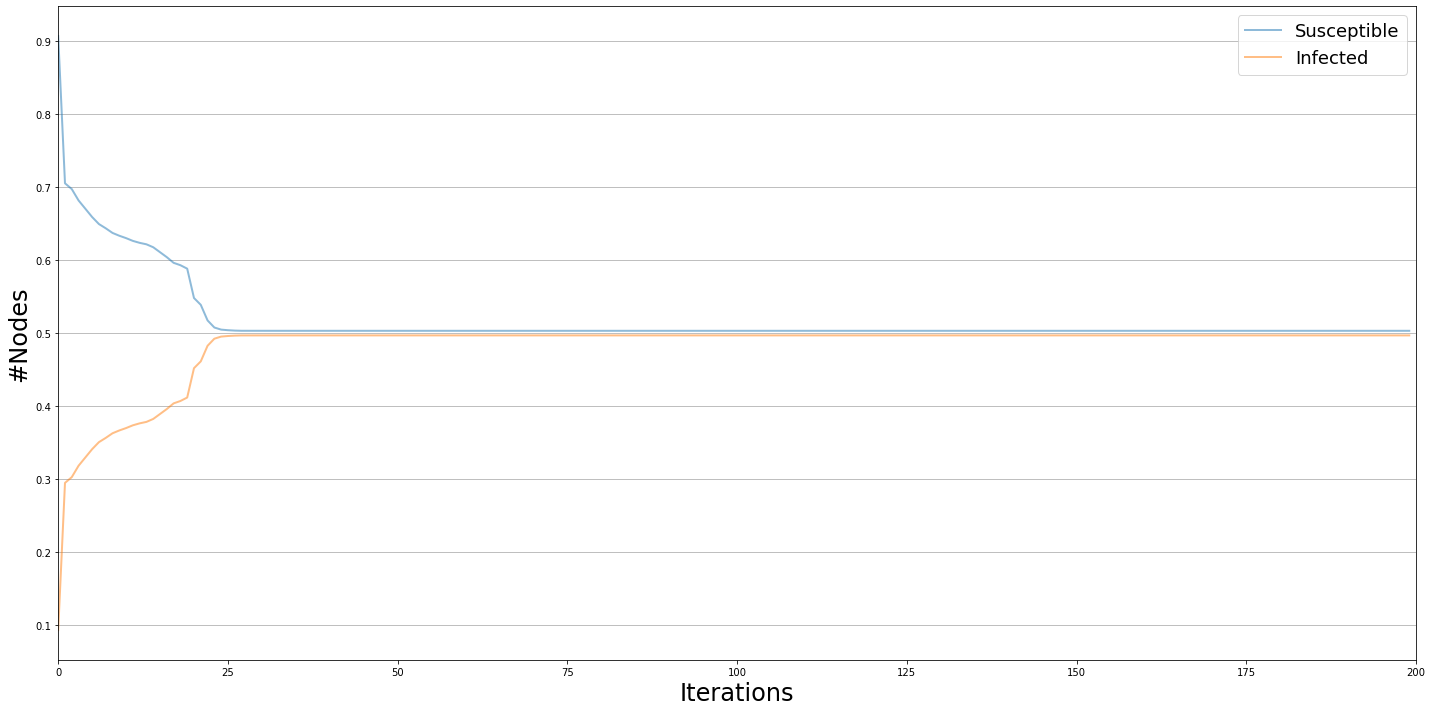

In [52]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

In [53]:
infected_nodes = list(g.neighbors(3))

In [54]:
# Model selection

model = ep.ThresholdModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_initial_configuration("Infected", infected_nodes)

# Setting node parameters
with suppress(Exception):
    for ind, row in df.iterrows():
        #print(i)
        b = row[' books']
        i = row['index']
        if b <= 200:
                cfg.add_node_configuration("threshold", i, 0.7) #users that are more indifferent 
        elif b > 200 and b <= 400:
                cfg.add_node_configuration("threshold", i, 0.6)
        elif b > 400 and b <= 600:
                cfg.add_node_configuration("threshold", i, 0.5)
        elif b > 600:
                cfg.add_node_configuration("threshold", i, 0.4)

model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200, progress_bar=True)
trends = model.build_trends(iterations)

100%|██████████| 200/200 [00:23<00:00,  8.58it/s]


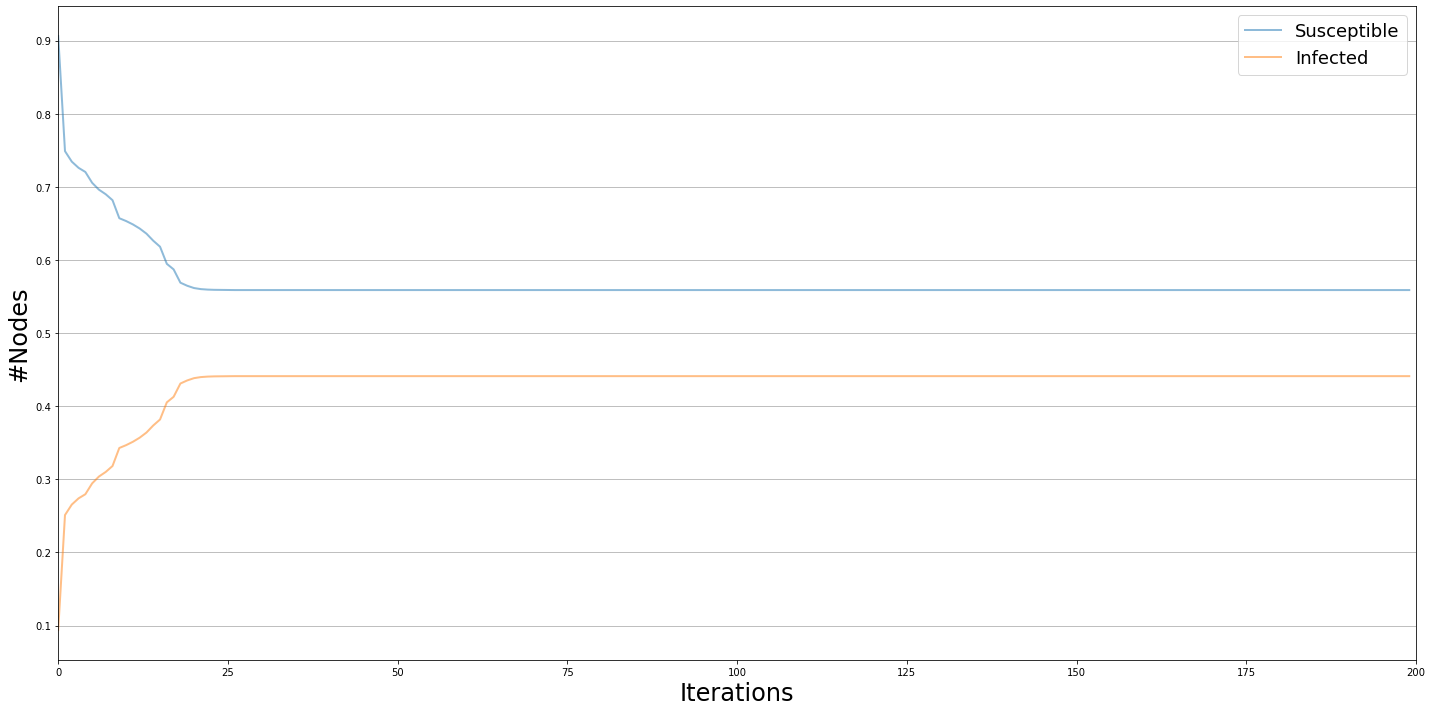

In [55]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

In [56]:
infected_nodes = list(g.neighbors(32))
# Model selection
model = ep.ThresholdModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_initial_configuration("Infected", infected_nodes)

# Setting node parameters
with suppress(Exception):
    for ind, row in df.iterrows():
        #print(i)
        b = row[' books']
        i = row['index']
        if b <= 200:
                cfg.add_node_configuration("threshold", i, 0.7) #users that are more indifferent 
        elif b > 200 and b <= 400:
                cfg.add_node_configuration("threshold", i, 0.6)
        elif b > 400 and b <= 600:
                cfg.add_node_configuration("threshold", i, 0.5)
        elif b > 600:
                cfg.add_node_configuration("threshold", i, 0.4)

model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200, progress_bar=True)
trends = model.build_trends(iterations)

100%|██████████| 200/200 [00:29<00:00,  6.70it/s]


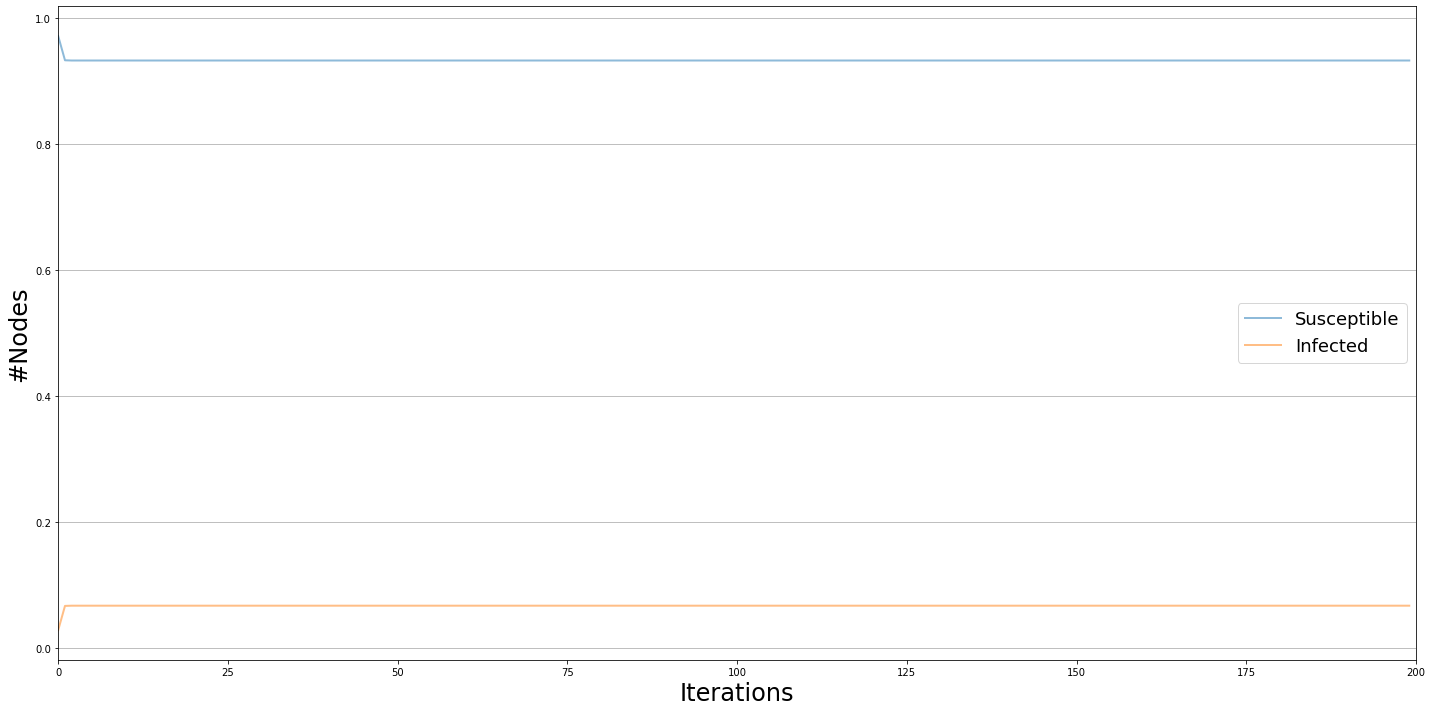

In [57]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

In [71]:
infected_nodes = set(list(g.neighbors(32)) +list(g.neighbors(2)) + list(g.neighbors(5)))
# Model selection
model = ep.ThresholdModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_initial_configuration("Infected", infected_nodes)

# Setting node parameters
with suppress(Exception):
    for ind, row in df.iterrows():
        #print(i)
        b = row[' books']
        i = row['index']
        if b <= 200:
                cfg.add_node_configuration("threshold", i, 0.7) #users that are more indifferent 
        elif b > 200 and b <= 400:
                cfg.add_node_configuration("threshold", i, 0.6)
        elif b > 400 and b <= 600:
                cfg.add_node_configuration("threshold", i, 0.5)
        elif b > 600:
                cfg.add_node_configuration("threshold", i, 0.4)

model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(25, progress_bar=True)
trends = model.build_trends(iterations)

100%|██████████| 25/25 [00:02<00:00,  9.34it/s]


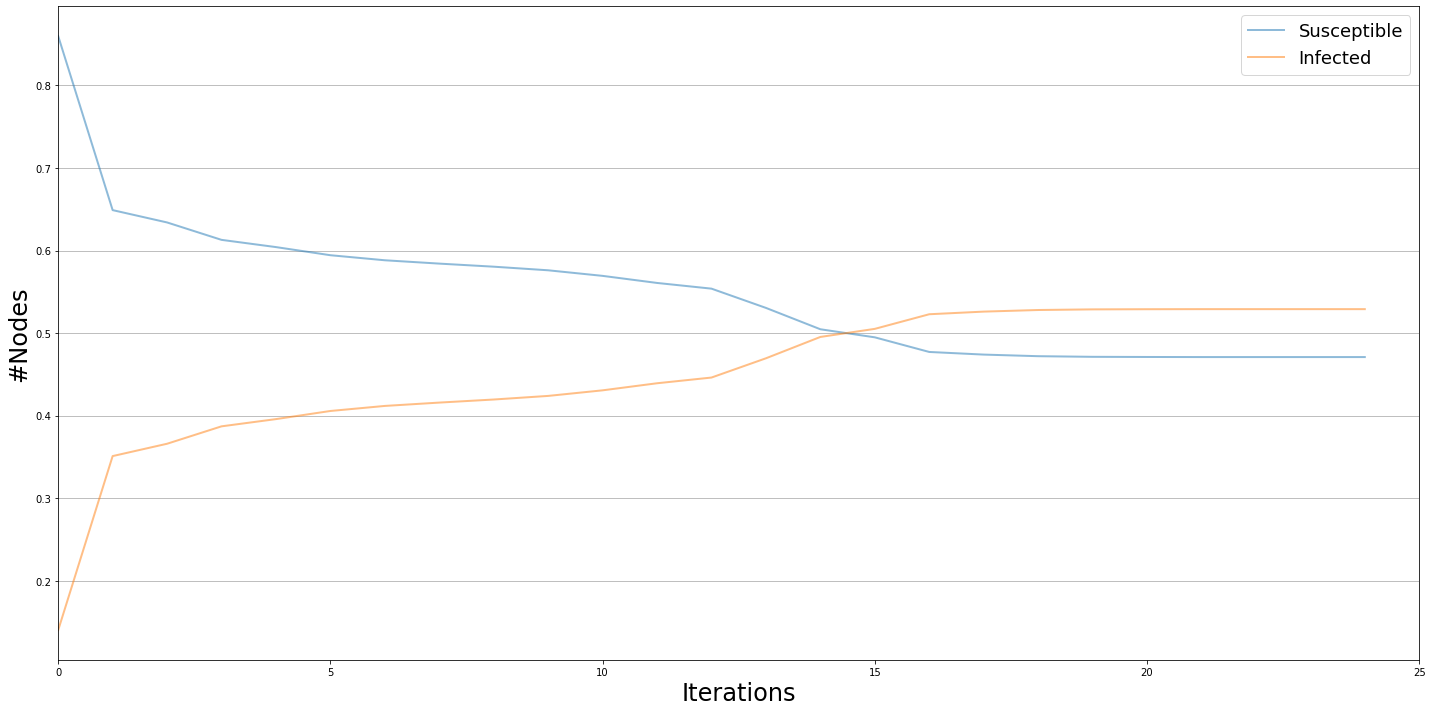

In [72]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

In [28]:
infected_nodes = set(list(g.neighbors(27)) +list(g.neighbors(2)))

In [29]:
len(infected_nodes)/g.number_of_nodes()

0.10419188379945213

In [23]:
infected_nodes = set(list(g.neighbors(27)) +list(g.neighbors(2)))
# Model selection
model = ep.ThresholdModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_initial_configuration("Infected", infected_nodes)

# Setting node parameters
with suppress(Exception):
    for ind, row in df.iterrows():
        #print(i)
        b = row[' books']
        i = row['index']
        if b <= 200:
                cfg.add_node_configuration("threshold", i, 0.7) #users that are more indifferent 
        elif b > 200 and b <= 400:
                cfg.add_node_configuration("threshold", i, 0.6)
        elif b > 400 and b <= 600:
                cfg.add_node_configuration("threshold", i, 0.5)
        elif b > 600:
                cfg.add_node_configuration("threshold", i, 0.4)

model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(10, progress_bar=True)
trends = model.build_trends(iterations)

100%|██████████| 10/10 [00:00<00:00, 11.28it/s]


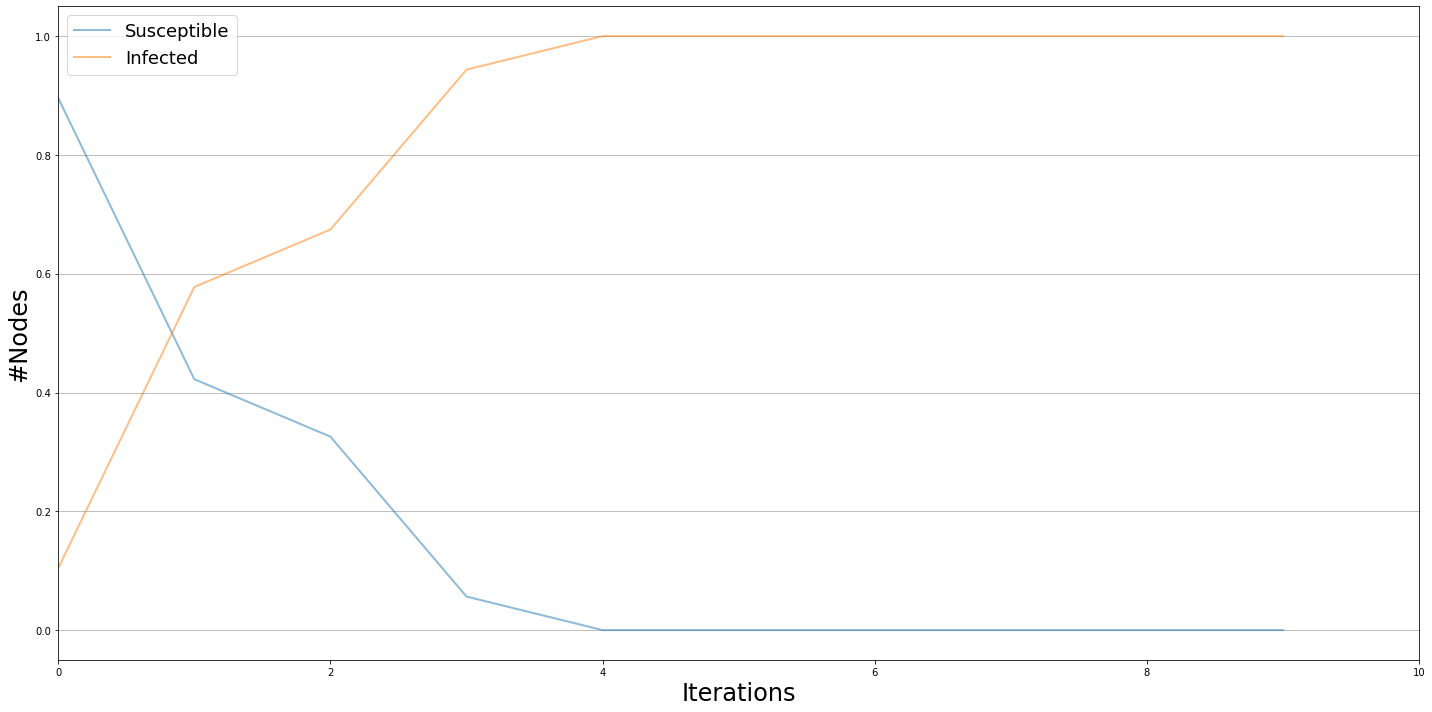

In [24]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()